In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('Data1.csv', header=0, index_col=0, parse_dates=True)
df

,theta_1,theta_2,theta_3,theta_4,theta_5,theta_6
2017-01-01,0.756936,-1.467790,0.096136,-0.115306,-0.447908,0.902579
2017-01-02,0.767089,0.185797,-1.428536,-0.086443,-0.954288,1.930909
2017-01-03,0.404544,1.415887,0.443466,0.000200,-0.892351,2.449691
2017-01-04,1.313957,-1.804471,-0.836986,0.011785,-1.012518,1.182085
2017-01-05,0.209862,1.315868,0.140993,-0.046473,-1.417092,1.742433
...,...,...,...,...,...,...
2019-12-27,-1.520171,-1.128868,1.108275,0.936817,0.948045,11.755980
2019-12-28,0.338910,-3.178251,1.484579,1.051123,1.025288,11.397092
2019-12-29,0.263781,0.045725,-0.112476,0.823782,0.914111,10.918941
2019-12-30,-0.425098,-1.002701,-0.834294,0.850904,0.801977,11.140722


Raw data from file "Data1.csv" consists of 1095 records. The first column contains dates [2017-2019], whereas the rest columns contain random generated number at first glance. Calling function **read_csv()** the first column was defined as index column with key describes as specific dates.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3150a007b8>,
      dtype=object)

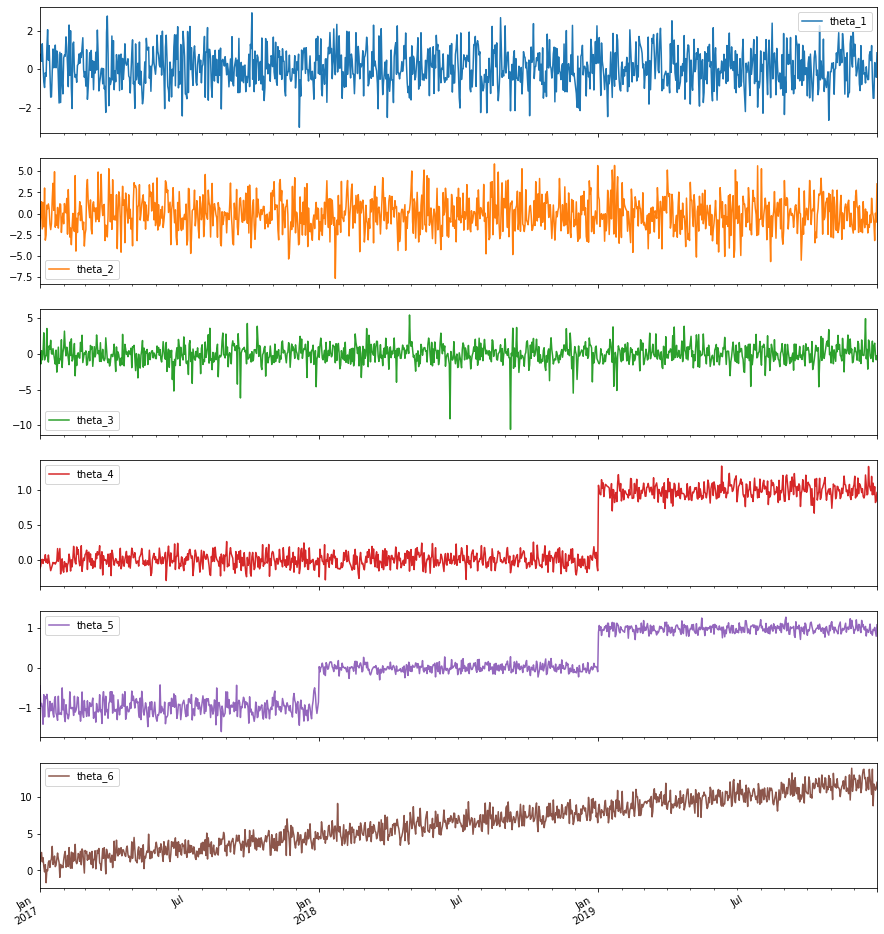

In [3]:
# Plotting data, each column in separate subplot, figsize defined by parameters
df.plot(y=df.columns.array, subplots=True, figsize=(15, len(df.columns.array)*3))

In [4]:
# merge dataframe to two columns. One column "variable" describes the variable name, 
# the second column "value" keeps value of variable
df_melted = pd.melt(df)
df_melted

,variable,value
0,theta_1,0.756936
1,theta_1,0.767089
2,theta_1,0.404544
3,theta_1,1.313957
4,theta_1,0.209862
...,...,...
6565,theta_6,11.755980
6566,theta_6,11.397092
6567,theta_6,10.918941
6568,theta_6,11.140722


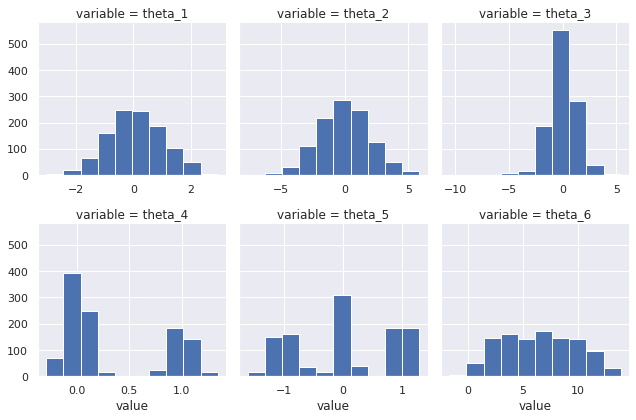

In [5]:
sns.set(style="darkgrid")
# maps dataset to multiple axes
graph = sns.FacetGrid(df_melted,col = 'variable',col_wrap = 3, sharex = False)
graph.map(plt.hist, 'value');

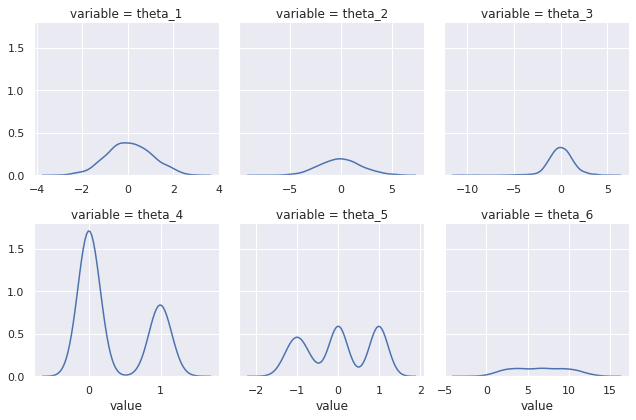

In [6]:
df_melted = pd.melt(df)
g = sns.FacetGrid(df_melted,col = 'variable',col_wrap = 3, sharex = False)
g.map(sns.kdeplot, 'value')

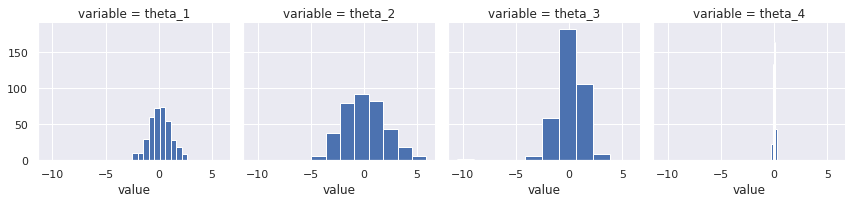

In [7]:
df_select = df.loc['2018-01-01':'2019-01-01','theta_1':'theta_4']
df_select_melt = pd.melt(df_select)
g = sns.FacetGrid(df_select_melt,col = 'variable', col_wrap = 4)
g.map(plt.hist, 'value');

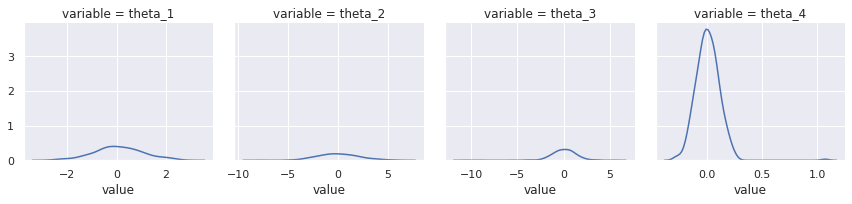

In [8]:
df_melt_select = pd.melt(df_select)
g = sns.FacetGrid(df_melt_select,col = 'variable',col_wrap = 4, sharex = False)
g.map(sns.kdeplot, 'value')

The model of density defines KDE (kernel density estiamtion) - this is expressed in terms of **probability distribution**. **theta_4** reaches values near 4 - most of those values are contained within the space of [-0.2;0.2].